In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bagpipes as pipes
from astropy.io import fits


z = 7.43
Mass = 9.
age = 0.3
tau = 0.3
Z = 1
U = -3
Av = 0.5


exponential = {}  # Tau model star formation history component
exponential["age"] = age  # Gyr
exponential["tau"] = tau  # Gyr
exponential["massformed"] = Mass  # log_10(M*/M_solar)
exponential["metallicity"] = Z  # Z/Z_oldsolar

dust = {}  # Dust component
dust["type"] = "Calzetti"  # Define the shape of the attenuation curve
dust["Av"] = Av  # magnitudes

model_components = {}  # The model components dictionary
if U>-4:
    nebular = {}  # Nebular emission component
    nebular["logU"] = U  # log_10(ionization parameter)
    model_components["nebular"] = nebular


model_components["redshift"] = z  # Observed redshift
model_components["exponential"] = exponential
model_components["dust"] = dust

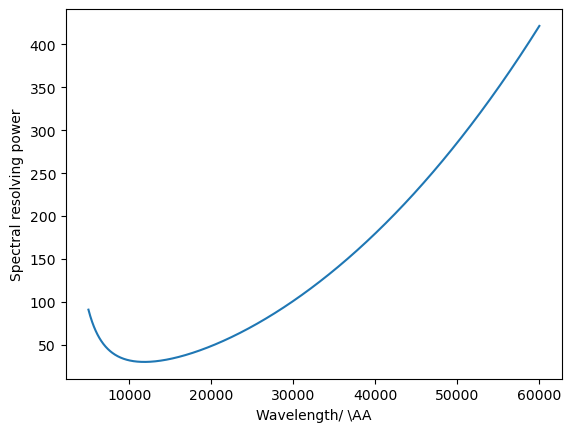

In [2]:
hdul = fits.open("/Users/jansen/JADES/LSFs/jwst_nirspec_prism_disp.fits")
model_components["R_curve"] = np.c_[10000*hdul[1].data["WAVELENGTH"], hdul[1].data["R"]]

plt.plot(model_components["R_curve"][:, 0], model_components["R_curve"][:, 1])
plt.xlabel("Wavelength/ \AA")
plt.ylabel("Spectral resolving power")
plt.show()

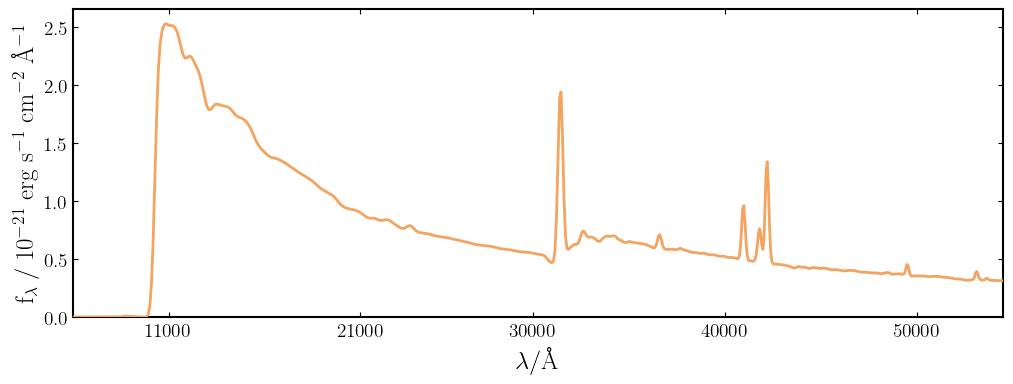

In [4]:
with fits.open('/Users/jansen/SOFTWARE/SED_Fitter/Data/183348_prism_clear_v5.0_1D.fits') as hdu:
    prism_wavs = hdu['WAVELENGTH'].data*1e6*1e4
            
model = pipes.model_galaxy(model_components, spec_wavs=prism_wavs)
fig = model.plot()

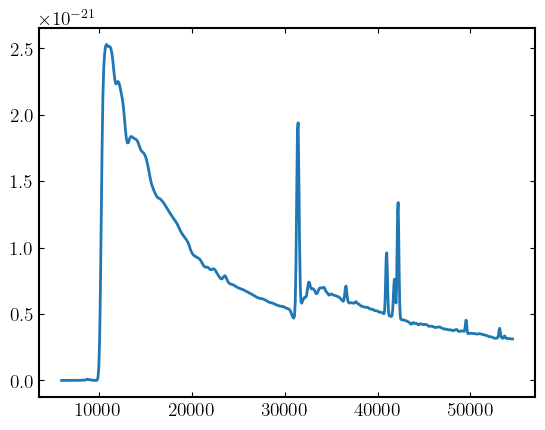

In [5]:
f,ax = plt.subplots(1)

ax.plot(model.spectrum[:,0], model.spectrum[:,1])

plt.show()